In [3]:
!pip install pandas



   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.5 MB 7.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.5 MB 7.2 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.5 MB 7.1 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 7.1 MB/s eta 0:00:01
   ------------------------- -------------- 7.3/11.5 MB 7.2 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.5 MB 7.2 MB/s eta 0:00:01
   ----------------------------------- ---- 10.2/11.5 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.5 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.6 MB 7.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.6 MB 6.9 MB/s eta 0:00:02
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

# Load both CSVs
df = pd.read_csv("bigdata.csv", encoding='ISO-8859-1')

# Display first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [3]:
# Basic overview
df.shape  # rows, columns

df.info()  # column types + missing values

df.columns  # column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [4]:
# Check how many missing values are in each column
df.isnull().sum()


Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
#Postal code has lot of missing values. Therefore,drop it 
df.drop(columns=['Postal Code'], inplace=True)


In [7]:
#change day format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')


In [8]:
df[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2012-07-31,2012-07-31
1,2013-02-05,2013-02-07
2,2013-10-17,2013-10-18
3,2013-01-28,2013-01-30
4,2013-11-05,2013-11-06


In [9]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_products.head(10)


Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64

In [11]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 7.1 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 7.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 7.2 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 7.4 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 7.4 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------- ----------- 1.6/2.2 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --------------------------- ------------ 1.8/2.7 MB 9.1 MB/s eta 0:00:01
   ------------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


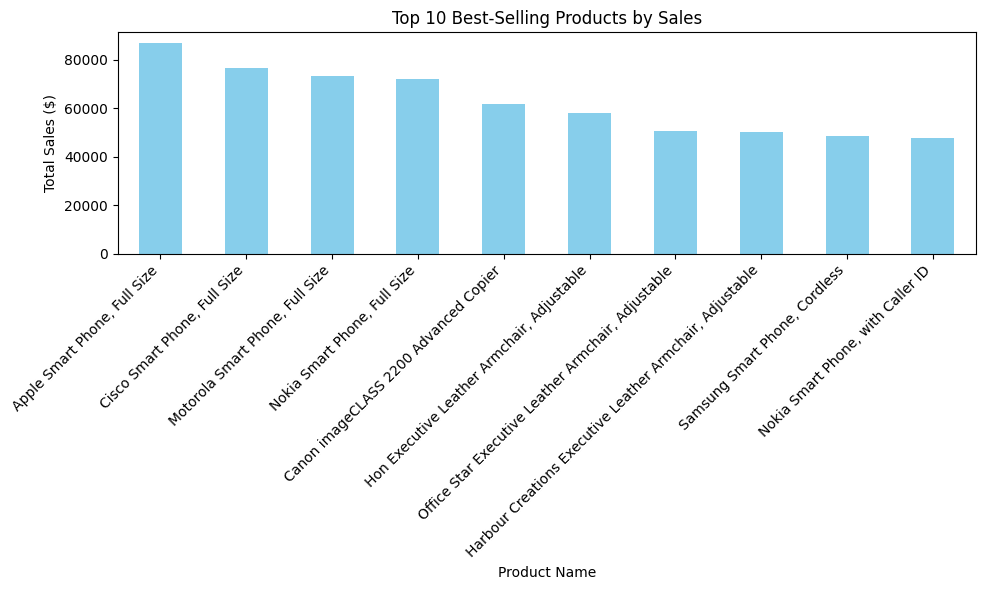

In [12]:
import matplotlib.pyplot as plt

# Select top 10
top_10 = top_products.head(10)

# Plot
plt.figure(figsize=(10,6))
top_10.plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products by Sales")
plt.ylabel("Total Sales ($)")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


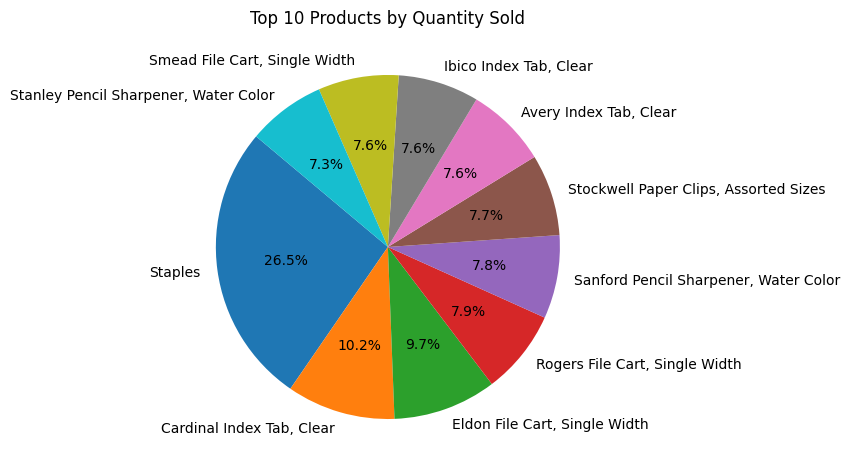

In [14]:
#Top-Selling Products by Quantity
top_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
top_quantity.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()


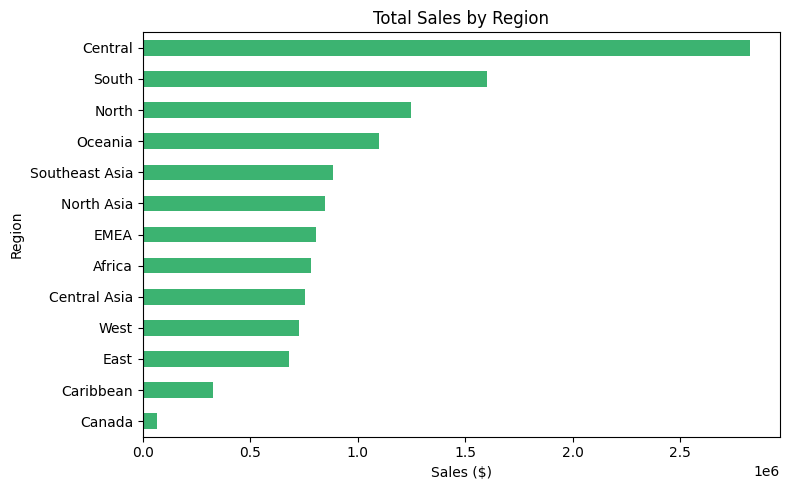

In [15]:
#Sales by Region 
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,5))
region_sales.plot(kind='barh', color='mediumseagreen')
plt.title("Total Sales by Region")
plt.xlabel("Sales ($)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


C:\Users\Dhruv\AppData\Local\Temp\ipykernel_14552\2621965226.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


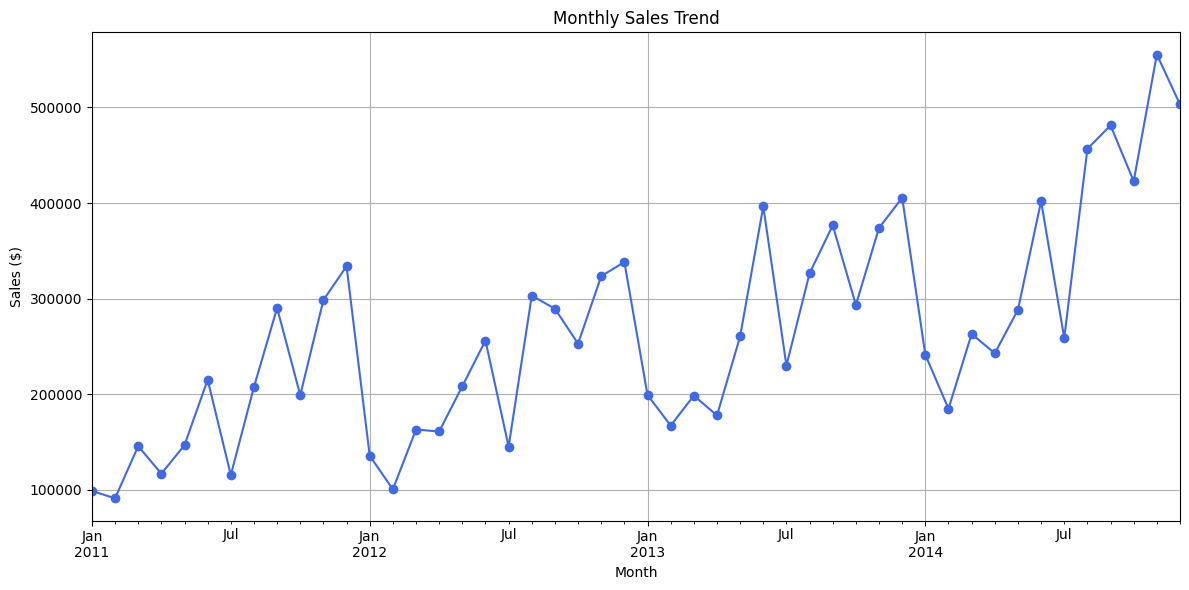

In [16]:
#Monthly Sales Trend
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', color='royalblue', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


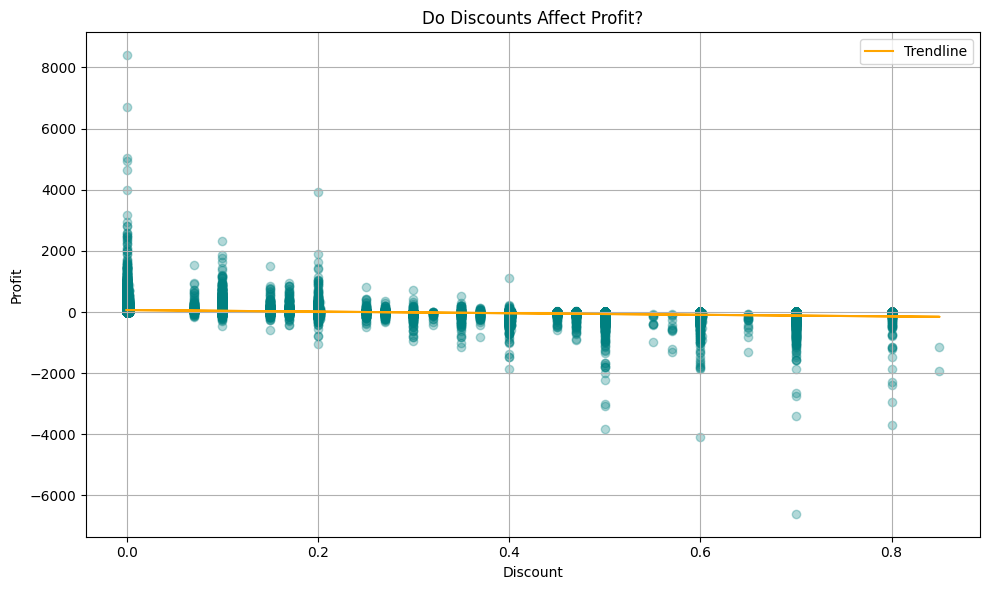

In [18]:
import numpy as np

plt.figure(figsize=(10,6))
x = df['Discount']
y = df['Profit']
plt.scatter(x, y, alpha=0.3, color='teal')

# Trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='orange', label='Trendline')

plt.title("Do Discounts Affect Profit?")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
